# GUC K-nearest neighbor Classification

# Mohamed Diaa Abdelaal
## 43-12821

### Import packages and data set
#### Import the "Classified data" file 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline



In [2]:
#Set index_col=0 to use the first column as the index.
df = pd.read_csv("Classified Data",index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [3]:
scaler = StandardScaler()

**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [4]:
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [5]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split, model fit and prediction

In [6]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.50, random_state=101)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [8]:
pred = knn.predict(X_test)

### Evaluation of classification quality using Confusion Matrix

[[233  17]
 [ 24 226]]


<AxesSubplot:>

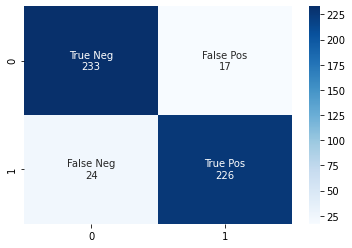

In [9]:
from sklearn.metrics import classification_report,confusion_matrix

# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_test,pred)

print(conf_matrix)


# Print the confusion matrix using Matplotlib

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')


***Print Misclassification error rate***

In [10]:
print(classification_report(y_test,pred))

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred)
Misclassification_error_rate = 1 - accuracy

print('Accuracy tested on X_test = ', accuracy*100 ,'%')
print('Misclassification error rate tested on X_test = ', Misclassification_error_rate*100 ,'%')

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       250
           1       0.93      0.90      0.92       250

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500

Accuracy tested on X_test =  91.8 %
Misclassification error rate tested on X_test =  8.199999999999996 %


# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value

Text(0, 0.5, 'Error Rate')

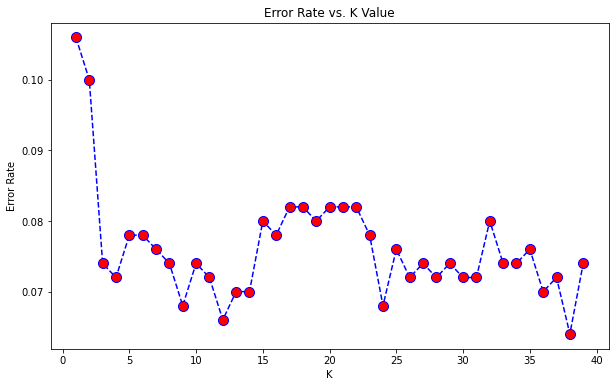

In [11]:
from sklearn.model_selection import cross_val_score


score=cross_val_score(knn,X_train,y_train)
np.mean(score)
error_list=[]

def get_cv_error(k):
    knn_new= KNeighborsClassifier(n_neighbors=k)
    knn_new.fit(X_train,y_train)
    score=cross_val_score(knn_new,X_train,y_train)
    np.mean(score)
    return 1-np.mean(score)


for k in range(1,40):
    error_list.append(get_cv_error(k))
     

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_list,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## plus 
The elbow method to pick a good K Value:

Text(0, 0.5, 'Error Rate')

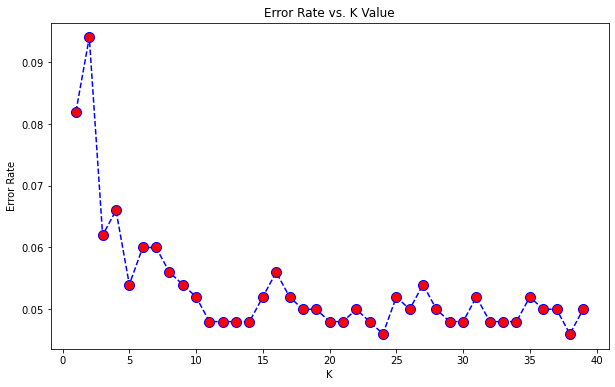

In [12]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')